# **1. Load Titanic Dataset**

Reference: https://www.kaggle.com/code

In [3]:
!pip install --upgrade scikit-learn==1.0.2
!pip install --upgrade numpy==1.21.5

Defaulting to user installation because normal site-packages is not writeable
  Using cached scikit-learn-1.0.2.tar.gz (6.7 MB)
  Installing build dependencies ... done
  Getting requirements to build wheel ... error
  error: subprocess-exited-with-error
  
  × Getting requirements to build wheel did not run successfully.
  │ exit code: 1
  ╰─> [33 lines of output]
      Traceback (most recent call last):
        File "/usr/lib/python3.12/site-packages/pip/_vendor/pyproject_hooks/_in_process/_in_process.py", line 353, in <module>
          main()
        File "/usr/lib/python3.12/site-packages/pip/_vendor/pyproject_hooks/_in_process/_in_process.py", line 335, in main
          json_out['return_val'] = hook(**hook_input['kwargs'])
                                   ^^^^^^^^^^^^^^^^^^^^^^^^^^^^
        File "/usr/lib/python3.12/site-packages/pip/_vendor/pyproject_hooks/_in_process/_in_process.py", line 112, in get_requires_for_build_wheel
          backend = _build_backend()
            

**Source** : https://www.kaggle.com/c/titanic/data

## **Data Dictionary**  

| Variable | Definition | Key |
|-:|-:|-|
| survival | Survival | 0 = No, 1 = Yes |
| pclass | Ticket class | 1 = 1st, 2 = 2nd, 3 = 3rd |
| sex | Sex |  |
| Age | Age in years |  |
| sibsp | # of siblings / spouses aboard the Titanic |  |
| parch | # of parents / children aboard the Titanic |  |
| ticket | Ticket number |  |
| fare | Passenger fare |  |
| cabin | Cabin number |  |
| embarked | Port of Embarkation | C = Cherbourg, Q = Queenstown, S = Southampton |

## **Variable Notes**  

**pclass**: A proxy for socio-economic status (SES)|
* 1st = Upper  
* 2nd = Middle  
* 3rd = Lower  


**age**: Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5

**sibsp**: The dataset defines family relations in this way...  
* Sibling = brother, sister, stepbrother, stepsister  
* Spouse = husband, wife (mistresses and fiancés were ignored)  

**parch**: The dataset defines family relations in this way...  
* Parent = mother, father  
* Child = daughter, son, stepdaughter, stepson  
* Some children travelled only with a nanny, therefore parch=0 for them.  

In [4]:
import time
import datetime

import numpy as np
import pandas as pd
pd.set_option('display.max_colwidth', None)

import matplotlib.pyplot as plt
# plt.style.use('seaborn')

from sklearn.model_selection import train_test_split

titanic_df = pd.read_csv('https://github.com/kaopanboonyuen/2110446_DataScience_2021s2/raw/main/datasets/Titanic.csv')

#Get Dummies (pandas)
from sklearn.preprocessing import LabelEncoder
convert_sex = LabelEncoder()
titanic_df['Sex'] = convert_sex.fit_transform(titanic_df['Sex']) # 0:female 1:male

feature_col = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare']
target_col = 'Survived'

train_df, test_df = train_test_split(titanic_df, test_size=0.3, random_state=0, stratify=titanic_df[target_col])
train_df, test_df = train_df.copy(), test_df.copy()

# Fill NA 'Age' with Median
train_df['Age'].fillna(train_df['Age'].median(), inplace = True)
test_df['Age'].fillna(train_df['Age'].median(), inplace = True)

/tmp/ipykernel_42818/3432910246.py:27: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_df['Age'].fillna(train_df['Age'].median(), inplace = True)
/tmp/ipykernel_42818/3432910246.py:28: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, 

In [5]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",0,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,S


# **2. Support Vector Machine**

https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html

In [6]:
from sklearn.svm import SVC

**Suggest Parameters**  

* **C**: 1  
* **kernel**: rbf  
* **gamma**: auto  

In [7]:
C = 1 #@param {type:"slider", min:1.0, max:3.0, step:0.1}
kernel = "rbf" #@param ['linear', 'poly', 'rbf']
gamma = "auto"  #@param ['scale', 'auto']

svm = SVC(
  C=C,
  kernel=kernel,
  gamma=gamma,
  cache_size=4096,
  random_state=0
)

svm_start_time = time.time()
# Training you tree
svm.fit(train_df[feature_col], train_df[target_col])
svm_end_time = time.time()
print(f"Training Time: {datetime.timedelta(seconds=svm_end_time-svm_start_time)}")

Training Time: 0:00:00.009227


In [8]:
# Predict as Class
train_predict = svm.predict(train_df[feature_col])
test_predict = svm.predict(test_df[feature_col])

In [9]:
# Show first 10 prediction
print(train_predict[:10])

[0 0 0 1 0 1 0 1 0 1]


In [10]:
# Actual Target
train_df[target_col][:10]

231    0
836    0
639    0
389    1
597    0
20     0
179    0
183    1
38     0
692    1
Name: Survived, dtype: int64

In [11]:
from sklearn.metrics import confusion_matrix

confusion_matrix(test_df[target_col], test_predict, labels=[1, 0])

array([[ 52,  51],
       [ 28, 137]])

In [12]:
from sklearn.metrics import classification_report

print(classification_report(test_df[target_col], test_predict,digits=4))

              precision    recall  f1-score   support

           0     0.7287    0.8303    0.7762       165
           1     0.6500    0.5049    0.5683       103

    accuracy                         0.7052       268
   macro avg     0.6894    0.6676    0.6723       268
weighted avg     0.6985    0.7052    0.6963       268



# **3.Visualization**

/tmp/ipykernel_42818/2469324469.py:26: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap_light = ListedColormap(cm.get_cmap(plt.get_cmap('tab20'))(cmap_val)[1:5:2])
/tmp/ipykernel_42818/2469324469.py:27: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap_bold = ListedColormap(cm.get_cmap(plt.get_cmap('tab20'))(cmap_val)[:4:2])
/home/inwpuun/.local/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


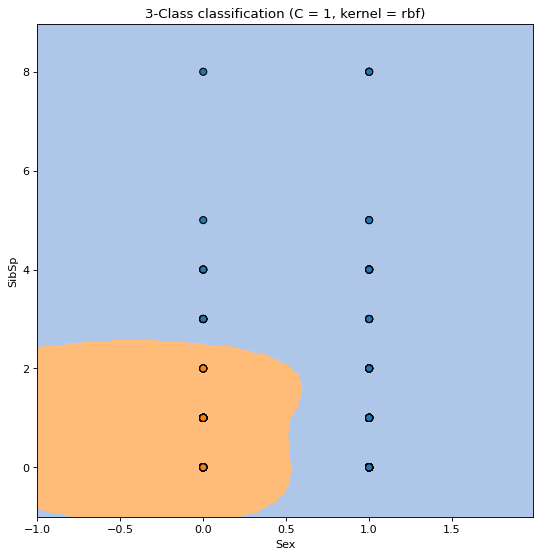

In [13]:
#@markdown # **Select parameters to plot**
#@markdown **(On simplyfied model for visualization - 2 variables)**

#@markdown Adapt from: https://scikit-learn.org/stable/auto_examples/neighbors/plot_classification.html
#@markdown **Suggest Parameters**  
#@markdown * **x_label**: Sex  
#@markdown * **y_label**: SibSp  
#@markdown Try on Different kernels to see hyperplanes.
C = 1
kernel = "rbf" #@param ['linear', 'poly', 'rbf']
gamma = "scale"

# x_label = 'sepal length (cm)' #@param ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
# y_label = 'petal length (cm)' #@param ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
x_label = 'Sex' #@param ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare']
y_label = 'SibSp' #@param ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare']

x_idx = train_df.columns.to_list().index(x_label)
y_idx = train_df.columns.to_list().index(y_label)

# Script from https://scikit-learn.org/stable/auto_examples/neighbors/plot_classification.html

from matplotlib import cm
from matplotlib.colors import ListedColormap
cmap_val = np.linspace(0.0, 1.0, 20)
cmap_light = ListedColormap(cm.get_cmap(plt.get_cmap('tab20'))(cmap_val)[1:5:2])
cmap_bold = ListedColormap(cm.get_cmap(plt.get_cmap('tab20'))(cmap_val)[:4:2])
h = 300  # step size in the mesh

model = SVC(
  C=C,
  kernel=kernel,
  gamma=gamma,
  cache_size=4096
)
model.fit(train_df.iloc[:, [x_idx, y_idx]], train_df[target_col])
x_min, x_max = train_df.iloc[:, x_idx].min() - 1, train_df.iloc[:, x_idx].max() + 1
y_min, y_max = train_df.iloc[:, y_idx].min() - 1, train_df.iloc[:, y_idx].max() + 1
xx, yy = np.meshgrid(
  np.arange(x_min, x_max, (x_max-x_min)/h),
  np.arange(y_min, y_max, (y_max-y_min)/h)
)
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(figsize=(8, 8), dpi=80)
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

# Plot also the training points
plt.scatter(
  train_df.iloc[:, x_idx],
  train_df.iloc[:, y_idx],
  c=train_df[target_col],
  cmap=cmap_bold,
  edgecolor='k',
  s=40
)
plt.xlabel(x_label)
plt.xlim(xx.min(), xx.max())
plt.ylabel(y_label)
plt.ylim(yy.min(), yy.max())
plt.title(f"3-Class classification (C = {C}, kernel = {kernel})")
plt.show()

## 3.1 Support Vectors

In [14]:
# Index of support vectors
svm.support_[:5]

array([2, 4, 5, 6, 8], dtype=int32)

In [15]:
# Alpha of Support Vector
svm.dual_coef_[0][:5]

array([-1.        , -1.        , -1.        , -0.88025532, -0.40586975])

In [16]:
# Support Vector
svm.support_vectors_[:5]

array([[ 3.  ,  1.  , 28.75,  1.  ,  0.  , 16.1 ],
       [ 3.  ,  1.  , 49.  ,  0.  ,  0.  ,  0.  ],
       [ 2.  ,  1.  , 35.  ,  0.  ,  0.  , 26.  ],
       [ 3.  ,  1.  , 36.  ,  0.  ,  0.  ,  0.  ],
       [ 3.  ,  0.  , 18.  ,  2.  ,  0.  , 18.  ]])